### I played with this dataset for various analysis, like
### 1. Correlation
### 2. Most viewed channel
### 3. Most subscribed channel
### 4. List of channels in each genre
### 5. Least and Highest ranked channel in each genre
### 6. Most viewed channel name in each genre

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/top-300-youtube-channels-data-analysis/top-300-youtube-channels.csv")
data.head()

,No,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,0,1,T-Series,237000000,2.164960e+11,18831,Music,2006
1,1,2,Cocomelon - Nursery Rhymes,154000000,1.526390e+11,861,Education,2006
2,2,3,SET India,152000000,1.401380e+11,105649,Film & Animation,2006
3,3,4,Sony SAB,77500000,9.295227e+10,65028,Film & Animation,2007
4,4,5,✿ Kids Diana Show,108000000,8.845263e+10,1070,People & Blogs,2015


## Data Preparation

In [3]:
data = data.drop(columns = "No",axis=0)

In [4]:
data.head()

,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,T-Series,237000000,2.164960e+11,18831,Music,2006
1,2,Cocomelon - Nursery Rhymes,154000000,1.526390e+11,861,Education,2006
2,3,SET India,152000000,1.401380e+11,105649,Film & Animation,2006
3,4,Sony SAB,77500000,9.295227e+10,65028,Film & Animation,2007
4,5,✿ Kids Diana Show,108000000,8.845263e+10,1070,People & Blogs,2015


In [5]:
data.isnull().sum()

Rank                0
Channel_Name        0
Subscriber_Count    0
Video_Views         0
Video_Count         0
Genre               0
Channel_Started     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              296 non-null    int64  
 1   Channel_Name      296 non-null    object 
 2   Subscriber_Count  296 non-null    int64  
 3   Video_Views       296 non-null    float64
 4   Video_Count       296 non-null    int64  
 5   Genre             296 non-null    object 
 6   Channel_Started   296 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.3+ KB


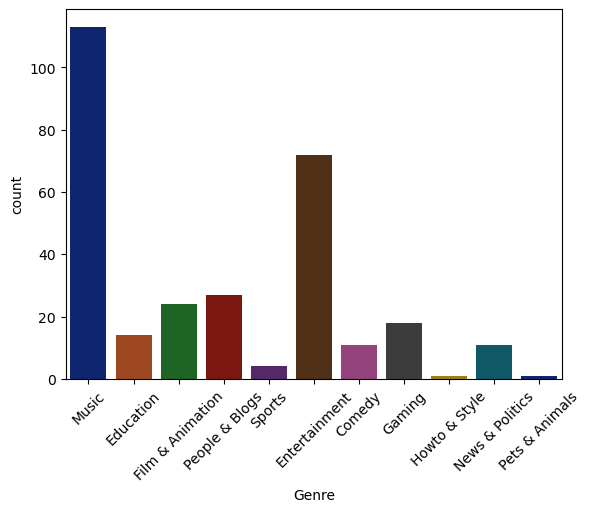

In [7]:
sns.countplot(data,x = 'Genre',palette = 'dark')
plt.xticks(rotation = 45)
plt.show()

In [8]:
print(f'Most top channels of youtube are under genre : {data.Genre[0]} ')

Most top channels of youtube are under genre : Music 


## Exploratory Data Analysis

In [9]:
data.describe()

,Rank,Subscriber_Count,Video_Views,Video_Count,Channel_Started
count,296.000000,2.960000e+02,2.960000e+02,296.000000,296.000000
mean,150.760135,3.159155e+07,2.199628e+10,19174.331081,2011.368243
std,86.813964,2.471406e+07,1.942544e+10,46072.700205,3.997822
min,1.000000,3.720000e+06,1.138766e+10,15.000000,2005.000000
25%,75.750000,1.737500e+07,1.357843e+10,386.250000,2008.000000
50%,151.500000,2.570000e+07,1.633676e+10,1984.500000,2011.000000
75%,225.250000,3.675000e+07,2.284494e+10,8558.000000,2014.000000
max,300.000000,2.370000e+08,2.164960e+11,345736.000000,2021.000000


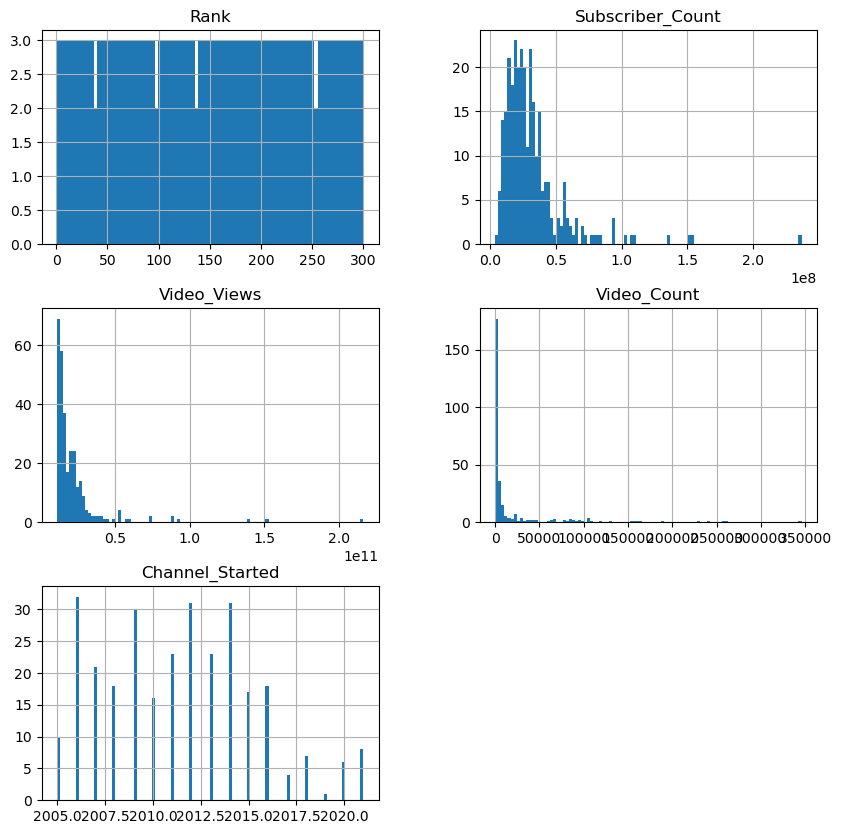

In [10]:
data.hist(bins = 100,figsize = (10,10))
plt.show()

## Checking for Outliers

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

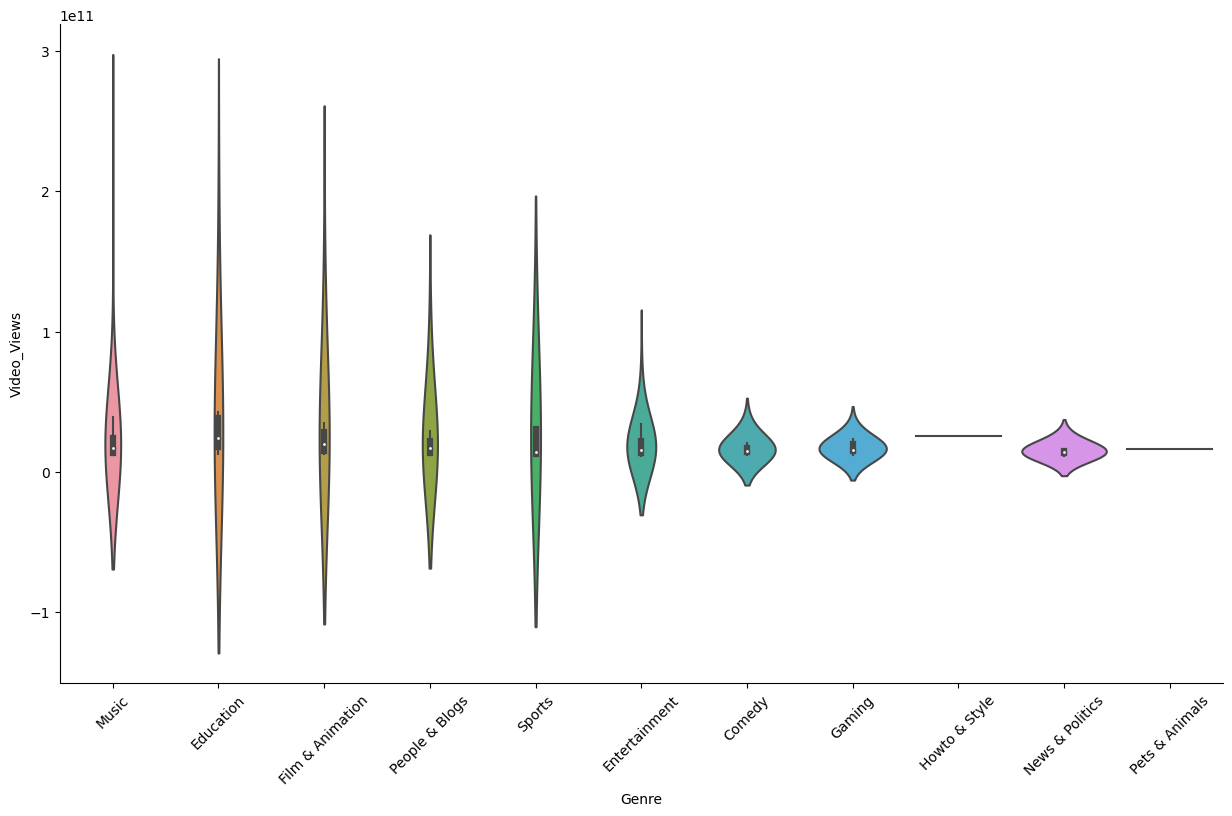

In [11]:
fig = plt.gcf()
g = sns.catplot(data,x='Genre',y = 'Video_Views',kind = 'violin',bw = 2)
g.set_xticklabels(rotation = 45)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
le.classes_

array(['Comedy', 'Education', 'Entertainment', 'Film & Animation',
       'Gaming', 'Howto & Style', 'Music', 'News & Politics',
       'People & Blogs', 'Pets & Animals', 'Sports'], dtype=object)

In [13]:
data.head()

,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,T-Series,237000000,2.164960e+11,18831,6,2006
1,2,Cocomelon - Nursery Rhymes,154000000,1.526390e+11,861,1,2006
2,3,SET India,152000000,1.401380e+11,105649,3,2006
3,4,Sony SAB,77500000,9.295227e+10,65028,3,2007
4,5,✿ Kids Diana Show,108000000,8.845263e+10,1070,8,2015


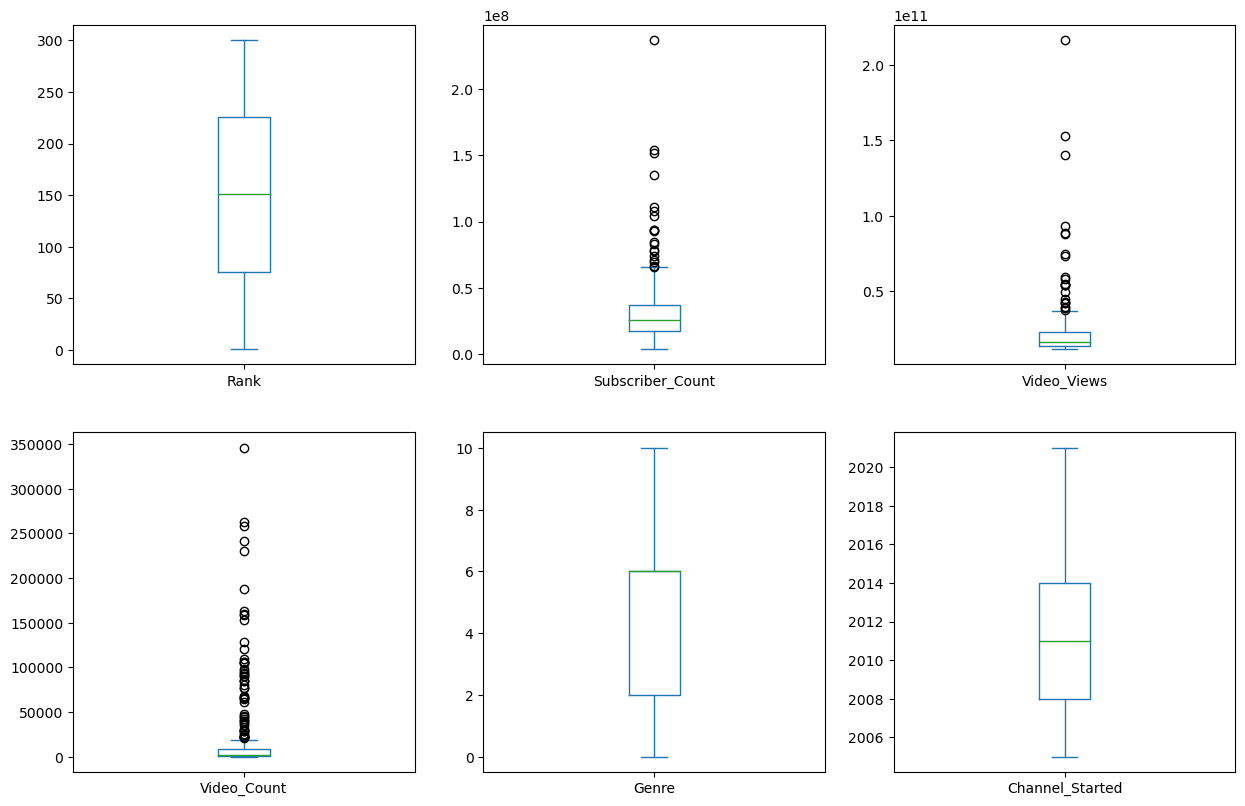

In [14]:
data[data.columns].plot(kind = 'box',subplots = True, layout=(3,3), figsize=(15,15))
plt.show()

## Correlation

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


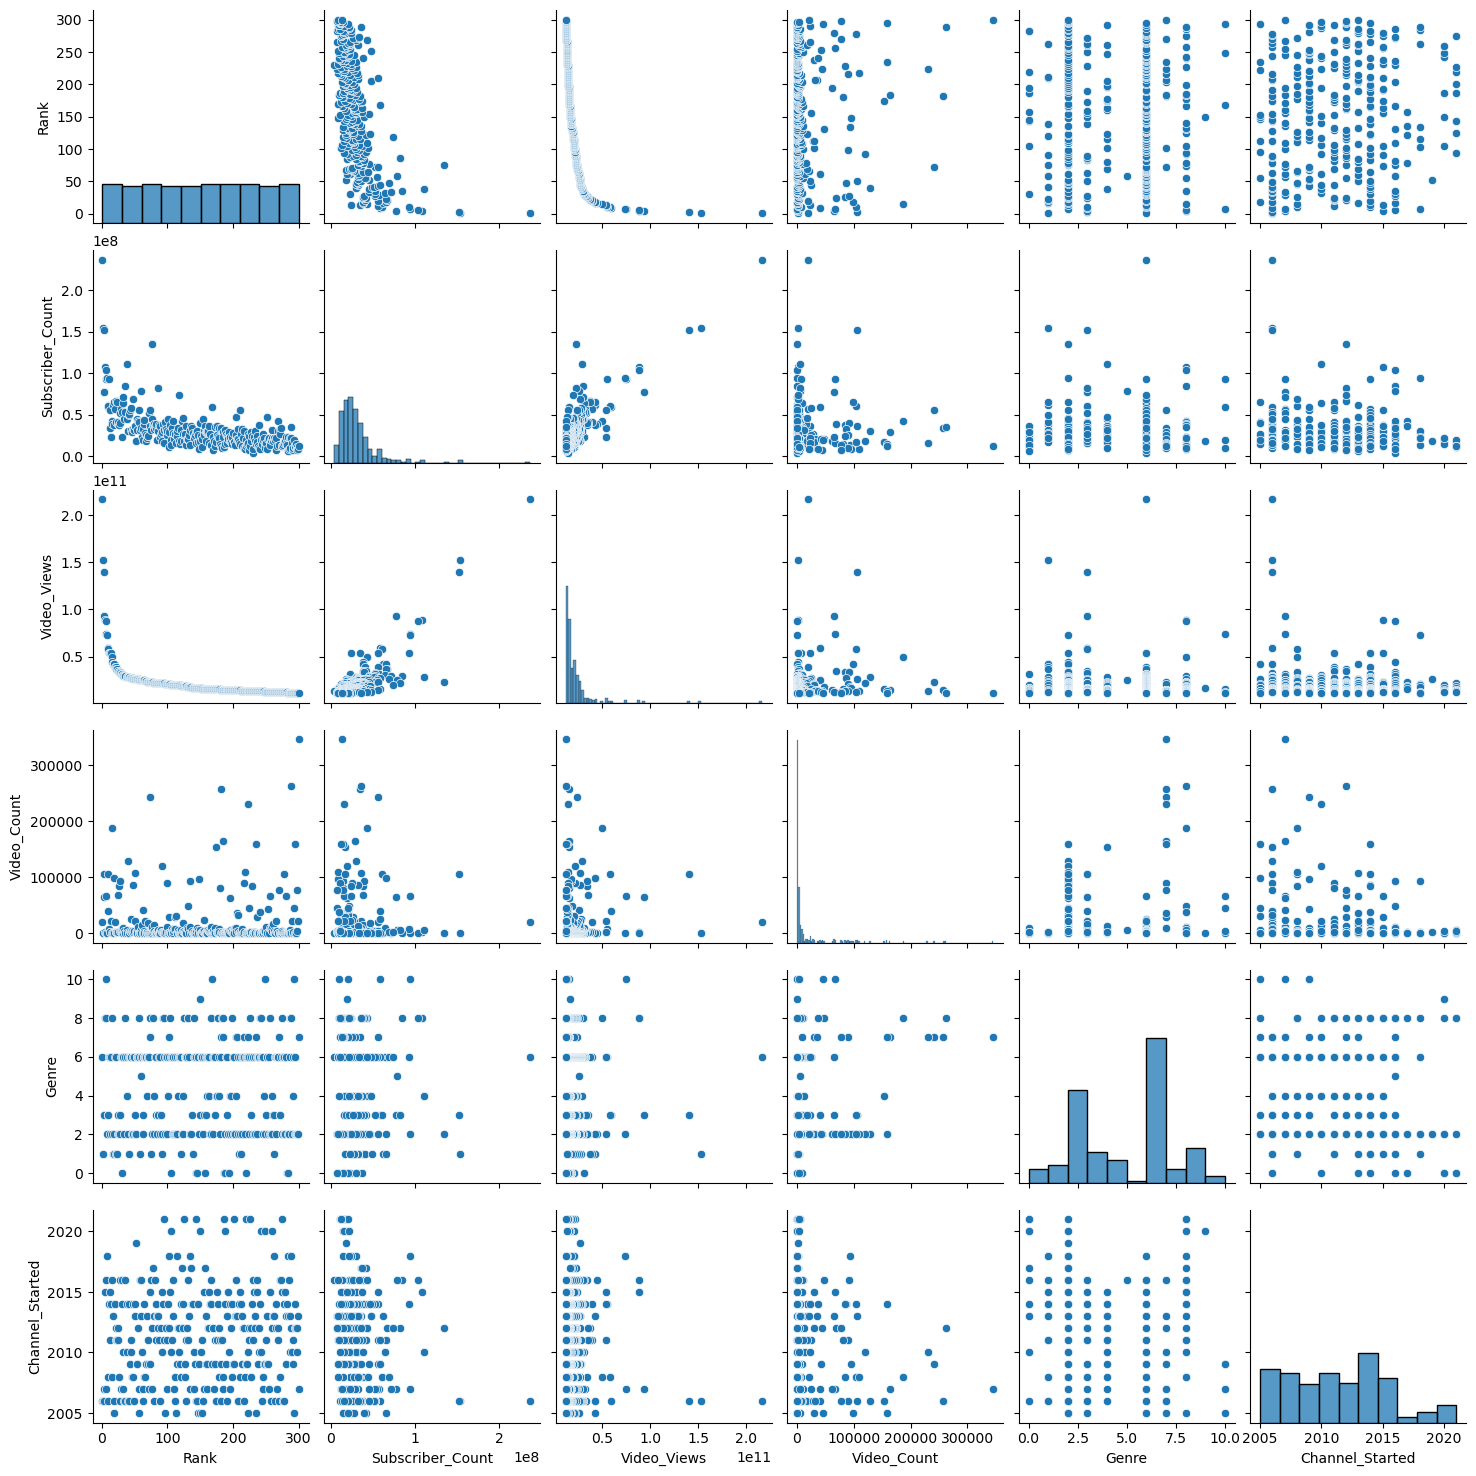

In [15]:
sns.pairplot(data)

/tmp/ipykernel_21/19136975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True,cmap = 'viridis')


<Axes: >

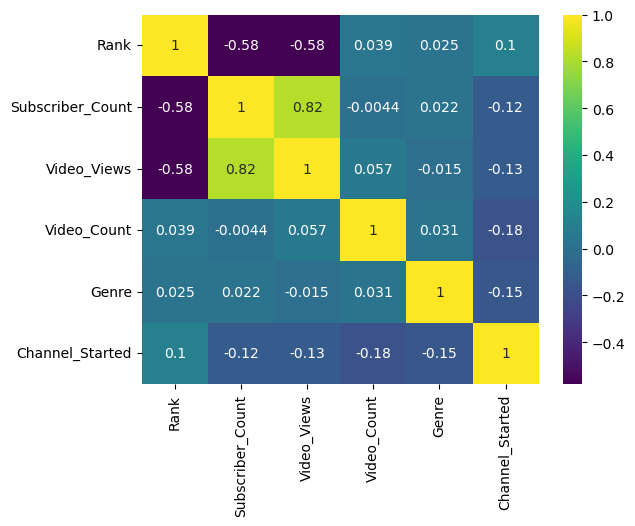

In [16]:
sns.heatmap(data.corr(),annot = True,cmap = 'viridis')

### Rank and Video views are inversely proportional
### Rank and Subscriber count are inversely proportional
### Subscriber count and Video views are positively correlated

<Axes: xlabel='Subscriber_Count', ylabel='Video_Views'>

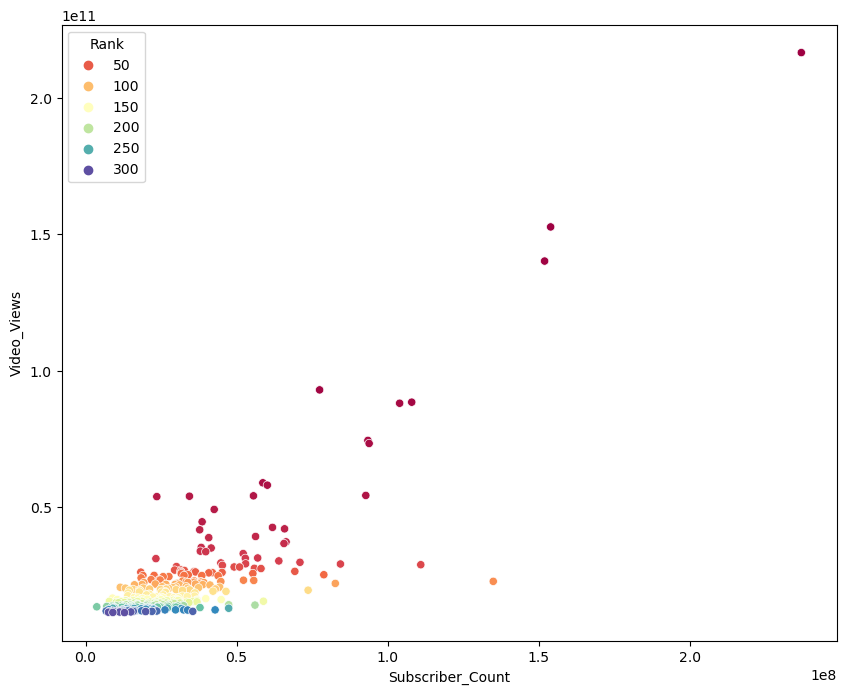

In [17]:
plt.subplots(figsize=(10,8))
sns.scatterplot(data,x = 'Subscriber_Count',y = 'Video_Views',hue = 'Rank',palette = 'Spectral')


#### Besides having outliers, they are not removed here, as removing outliers will affect the data and will not give significant results. 

## Data Analysis

In [18]:
data.columns


Index(['Rank', 'Channel_Name', 'Subscriber_Count', 'Video_Views',
       'Video_Count', 'Genre', 'Channel_Started'],
      dtype='object')

In [19]:
data['Genre']=le.inverse_transform(data['Genre'])

In [20]:
grp1 = data.groupby('Genre')['Channel_Name','Rank','Subscriber_Count','Video_Views'].min().sort_values(by = 'Video_Views',ascending = False)
grp1

/tmp/ipykernel_21/1646290011.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp1 = data.groupby('Genre')['Channel_Name','Rank','Subscriber_Count','Video_Views'].min().sort_values(by = 'Video_Views',ascending = False)


,Channel_Name,Rank,Subscriber_Count,Video_Views
Genre,,,,
Howto & Style,5-Minute Crafts,59,78900000,2.525169e+10
Pets & Animals,That Little Puff,149,18900000,1.658276e+10
Education,BabyBus - Canciones Infantiles & Videos para N...,2,17300000,1.267550e+10
Film & Animation,Colors TV,3,15700000,1.236707e+10
Comedy,Alan Chikin Chow,31,6830000,1.195801e+10
People & Blogs,ABP NEWS,5,9250000,1.184056e+10
Gaming,A4,38,9840000,1.179165e+10
Sports,Dude Perfect,7,9520000,1.176198e+10
Music,1theK (원더케이),1,3720000,1.173462e+10


In [21]:
print(f'Most viewed channel is : {grp1.iloc[0,0]}, which is from genre : {grp1.index[0]} ')

Most viewed channel is : 5-Minute Crafts, which is from genre : Howto & Style 


In [22]:
grp2 = data.groupby('Genre')['Channel_Name','Rank','Subscriber_Count','Video_Views'].min().sort_values(by = 'Subscriber_Count',ascending = False)
grp2

/tmp/ipykernel_21/3866229041.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp2 = data.groupby('Genre')['Channel_Name','Rank','Subscriber_Count','Video_Views'].min().sort_values(by = 'Subscriber_Count',ascending = False)


,Channel_Name,Rank,Subscriber_Count,Video_Views
Genre,,,,
Howto & Style,5-Minute Crafts,59,78900000,2.525169e+10
Pets & Animals,That Little Puff,149,18900000,1.658276e+10
Education,BabyBus - Canciones Infantiles & Videos para N...,2,17300000,1.267550e+10
Film & Animation,Colors TV,3,15700000,1.236707e+10
News & Politics,ABC News,73,10300000,1.138766e+10
Gaming,A4,38,9840000,1.179165e+10
Sports,Dude Perfect,7,9520000,1.176198e+10
People & Blogs,ABP NEWS,5,9250000,1.184056e+10
Entertainment,A.O.D,8,7020000,1.144207e+10


In [23]:
print(f'Most subscribed channel is : {grp2.iloc[0,0]}, which is from genre : {grp2.index[0]} ')

Most subscribed channel is : 5-Minute Crafts, which is from genre : Howto & Style 


In [24]:
print('Highest Rank and Lowest Rank in each Genre:\n\n')
data.groupby('Genre')['Channel_Name','Rank'].agg(['min','max']).sort_values([('Rank','min')])

Highest Rank and Lowest Rank in each Genre:




/tmp/ipykernel_21/546899380.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Genre')['Channel_Name','Rank'].agg(['min','max']).sort_values([('Rank','min')])


Channel_Name  \
                                                                min   
Genre                                                                 
Music                                                  1theK (원더케이)   
Education         BabyBus - Canciones Infantiles & Videos para N...   
Film & Animation                                          Colors TV   
People & Blogs                                             ABP NEWS   
Sports                                                 Dude Perfect   
Entertainment                                                 A.O.D   
Comedy                                             Alan Chikin Chow   
Gaming                                                           A4   
Howto & Style                                       5-Minute Crafts   
News & Politics                                            ABC News   
Pets & Animals                                     That Little Puff   

                                     Rank       
                                 max  min  max  
Genre                                           
Music                    toyorbabytv    1  294  
Education         infobells - Telugu    2  262  
Film & Animation      Маша и Медведь    3  272  
People & Blogs     ✿ Kids Diana Show    5  289  
Sports                           WWE    7  293  
Entertainment             ช่อง one31    8  299  
Comedy                        東海オンエア   31  283  
Gaming                   rezendeevil   38  292  
Howto & Style        5-Minute Crafts   59   59  
News & Politics             Zee News   73  300  
Pets & Animals      That Little Puff  149  149

In [25]:
print('List of Music youtube channels:\n\n')
f1 = data[data['Genre'] == 'Music']
grp4 = f1.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp4

List of Music youtube channels:




,Genre,Music
Channel_Name,Rank,
T-Series,1,2.164960e+11
Zee Music Company,11,5.429511e+10
El Reino Infantil,12,5.415190e+10
netd müzik,14,5.386729e+10
Wave Music,20,3.925891e+10
...,...,...
Indosiar,280,1.202071e+10
AdeleVEVO,281,1.201895e+10
OneDirectionVEVO,287,1.189339e+10


In [26]:
print('List of Entertainment youtube channels:\n\n')
f2 = data[data['Genre'] == 'Entertainment']
grp5 = f2.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp5

List of Entertainment youtube channels:




,Genre,Entertainment
Channel_Name,Rank,
Vlad and Niki,8,7.333358e+10
Ryan's World,13,5.400822e+10
Toys and Colors,16,4.464235e+10
Zee TV,18,4.206467e+10
WorkpointOfficial,24,3.526552e+10
...,...,...
eltrece,295,1.170987e+10
Jake Fellman,296,1.161863e+10
DisneyJuniorUK,297,1.158696e+10


In [27]:
print('List of People & Blogs youtube channels:\n\n')
f3 = data[data['Genre'] == 'People & Blogs']
grp6 = f3.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp6

List of People & Blogs youtube channels:




,Genre,People & Blogs
Channel_Name,Rank,
✿ Kids Diana Show,5,8.845263e+10
Like Nastya,6,8.806035e+10
ABS-CBN Entertainment,15,4.916427e+10
BLACKPINK,36,2.917826e+10
Shakira,56,2.592901e+10
Maria Clara & JP,74,2.298510e+10
shfa2 - شفا,78,2.270896e+10
LUCCAS NETO - LUCCAS TOON,93,2.161968e+10
LeoNata Family,94,2.156239e+10


In [28]:
print('List of Film & Animation youtube channels:\n\n')
f4 = data[data['Genre'] == 'Film & Animation']
grp7 = f4.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp7

List of Film & Animation youtube channels:




,Genre,Film & Animation
Channel_Name,Rank,
SET India,3,1.401380e+11
Sony SAB,4,9.295227e+10
Movieclips,9,5.892302e+10
Colors TV,10,5.805700e+10
Маша и Медведь,25,3.504152e+10
YRF,28,3.300170e+10
Sony PAL,50,2.641222e+10
Galinha Pintadinha,63,2.497246e+10
Masha and The Bear,83,2.237585e+10


In [29]:
print('List of Gaming youtube channels:\n\n')
f5 = data[data['Genre'] == 'Gaming']
grp8 = f5.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp8

List of Gaming youtube channels:




,Genre,Gaming
Channel_Name,Rank,
PewDiePie,38,2.892011e+10
FGTeeV,69,2.345855e+10
SSSniperWolf,80,2.257144e+10
A4,101,2.071097e+10
Markiplier,116,1.967553e+10
DanTDM,124,1.905028e+10
jacksepticeye,160,1.591920e+10
Aphmau,164,1.579758e+10
IGN,174,1.544175e+10


In [30]:
print('List of Education youtube channels:\n\n')
f6 = data[data['Genre'] == 'Education']
grp9 = f6.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp9

List of Education youtube channels:




,Genre,Education
Channel_Name,Rank,
Cocomelon - Nursery Rhymes,2,1.526390e+11
ChuChu TV Nursery Rhymes & Kids Songs,17,4.258951e+10
Super Simple Songs - Kids Songs,19,4.171598e+10
Little Baby Bum - Nursery Rhymes & Kids Songs,21,3.884019e+10
Pinkfong Baby Shark - Kids' Songs & Stories,23,3.668882e+10
Infobells - Hindi,41,2.809308e+10
BabyBus - Kids Songs and Cartoons,58,2.565205e+10
Genevieve's Playhouse - Learning Videos for Kids,75,2.290383e+10
Little Angel: Nursery Rhymes & Kids Songs,91,2.169931e+10


In [31]:
print('List of Comedy youtube channels:\n\n')
f7 = data[data['Genre'] == 'Comedy']
grp10 = f7.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp10

List of Comedy youtube channels:




,Genre,Comedy
Channel_Name,Rank,
LankyBox,31,3.115542e+10
Alan Chikin Chow,105,2.034840e+10
Marta and Rustam,143,1.694961e+10
The Tonight Show Starring Jimmy Fallon,145,1.679884e+10
Jkk Entertainment,157,1.601845e+10
MoniLina,186,1.496042e+10
dednahype,187,1.494777e+10
Talking Tom,194,1.466889e+10
Shorts Break,219,1.378053e+10


In [32]:
print('List of News & Politics youtube channels:\n\n')
f8 = data[data['Genre'] == 'News & Politics']
grp11 = f8.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp11

List of News & Politics youtube channels:




,Genre,News & Politics
Channel_Name,Rank,
Aaj Tak,73,2.315845e+10
Inside Edition,102,2.065091e+10
IndiaTV,182,1.505676e+10
Zee News,184,1.501175e+10
Raffy Tulfo in Action,204,1.428593e+10
Tlnovelas,206,1.417419e+10
Fox News,216,1.383638e+10
Thairath Online,223,1.363425e+10
CNN,235,1.337168e+10


In [33]:
print('List of Sports youtube channels:\n\n')
f9 = data[data['Genre'] == 'Sports']
grp12 = f9.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp12

List of Sports youtube channels:




,Genre,Sports
Channel_Name,Rank,
WWE,7,7.444787e+10
Dude Perfect,168,1.554693e+10
SportsNation,249,1.298180e+10
NBA,293,1.176198e+10


In [34]:
print('List of Howto & Style youtube channels:\n\n')
f10 = data[data['Genre'] == 'Howto & Style']
grp13 = f10.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp13

List of Howto & Style youtube channels:




,Genre,Howto & Style
Channel_Name,Rank,
5-Minute Crafts,59,2.525169e+10


In [35]:
print('List of Pets & Animals youtube channels:\n\n')
f11 = data[data['Genre'] == 'Pets & Animals']
grp14 = f11.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp14

List of Pets & Animals youtube channels:




,Genre,Pets & Animals
Channel_Name,Rank,
That Little Puff,149,1.658276e+10


In [36]:
print(f'Under Genre "{grp4.columns[0]}", Most viewed channel is "{grp4.index[0][0]}"\n')
print(f'Under Genre "{grp5.columns[0]}", Most viewed channel is "{grp5.index[0][0]}"\n')
print(f'Under Genre "{grp6.columns[0]}", Most viewed channel is "{grp6.index[0][0]}"\n')
print(f'Under Genre "{grp7.columns[0]}", Most viewed channel is "{grp7.index[0][0]}"\n')
print(f'Under Genre "{grp8.columns[0]}", Most viewed channel is "{grp8.index[0][0]}"\n')
print(f'Under Genre "{grp9.columns[0]}", Most viewed channel is "{grp9.index[0][0]}"\n')
print(f'Under Genre "{grp10.columns[0]}", Most viewed channel is "{grp10.index[0][0]}"\n')
print(f'Under Genre "{grp11.columns[0]}", Most viewed channel is "{grp11.index[0][0]}"\n')
print(f'Under Genre "{grp12.columns[0]}", Most viewed channel is "{grp12.index[0][0]}"\n')
print(f'Under Genre "{grp13.columns[0]}", Most viewed channel is "{grp13.index[0][0]}"\n')
print(f'Under Genre "{grp14.columns[0]}", Most viewed channel is "{grp14.index[0][0]}"')

Under Genre "Music", Most viewed channel is "T-Series"

Under Genre "Entertainment", Most viewed channel is "Vlad and Niki"

Under Genre "People & Blogs", Most viewed channel is "✿ Kids Diana Show"

Under Genre "Film & Animation", Most viewed channel is "SET India"

Under Genre "Gaming", Most viewed channel is "PewDiePie"

Under Genre "Education", Most viewed channel is "Cocomelon - Nursery Rhymes"

Under Genre "Comedy", Most viewed channel is "LankyBox"

Under Genre "News & Politics", Most viewed channel is "Aaj Tak"

Under Genre "Sports", Most viewed channel is "WWE"

Under Genre "Howto & Style", Most viewed channel is "5-Minute Crafts"

Under Genre "Pets & Animals", Most viewed channel is "That Little Puff"
